**Capstone for the HarvardX Course "Introduction to Data Science with Python"**

**Task**: Compare scenarios from different countries' COVID-19 Response to emphasize the problem of relying on a single metric such as accuracy for prediction. 

**Problem Setting**: At the peak of the COVID-19 pandemic, hospital authorities had to make a call about who to admit and who to send home given the limited available resources. Our problem is to have a classifier that suggests whether a patient should be immediately admitted to the hospital or sent home.

**The Data**: The data consists of the following predictors:
- Age
- Sex
- Cough
- Fever
- Chills
- Sore Throat
- Headache
- Fatigue

The outcome is a classification prediction to indicate the **urgency of admission**. 
- **Positive**: Indicates that a patient that was admitted within 1 day from the onset of symptoms.
- **Negative**: Indicates everyone else.



**I. Data Preprocessing and Exploratory Data Analysis (EDA)**

In [45]:
# Import necessary libraries

# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from scipy import signal

warnings.filterwarnings("ignore")
%matplotlib inline

In [46]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframed
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [47]:
# Check if there are any missing or Null values
missingvalues = df.isnull().sum(axis=1)
print(missingvalues)

0       0
1       0
2       0
3       0
4       0
       ..
996     2
997     0
998     0
999     1
1000    0
Length: 1001, dtype: int64


In [48]:
# Find the number of rows with missing values
numrows_missingvalues = (missingvalues > 0).sum()
num_null = numrows_missingvalues
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [49]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
df_drop = df.drop('Urgency', axis=1)
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df_drop)

In [50]:
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
df_imputed = pd.DataFrame(df_imputed, columns=df_drop.columns)
df_imputed['Urgency']= df['Urgency']
df = df_imputed
df

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


**EDA**

In [51]:
# Splitting the ages into bins or intervals 
age = df['age']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(df)
df.head()

       age  sex  cough  fever  chills  sore_throat  headache  fatigue  \
0     30.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
1     47.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
2     49.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
3     50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0   
4     59.0  0.0    0.0    1.0     0.0          0.0       0.0      0.0   
...    ...  ...    ...    ...     ...          ...       ...      ...   
996   72.0  1.0    0.0    0.4     0.0          0.0       0.0      0.0   
997   56.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0   
998   43.0  1.0    0.0    1.0     0.0          0.0       0.0      0.0   
999   39.0  1.0    0.0    1.0     0.0          0.0       0.0      0.0   
1000  50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0   

      Urgency Age_Group  
0           0     31-40  
1           0     41-50  
2           0     41-50  
3           0     5

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31-40
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51-60
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,51-60


In [52]:
# Count the number of individuals needing hospital beds urgently in each age group
urgency_counts = df.groupby('Age_Group')['Urgency'].sum()

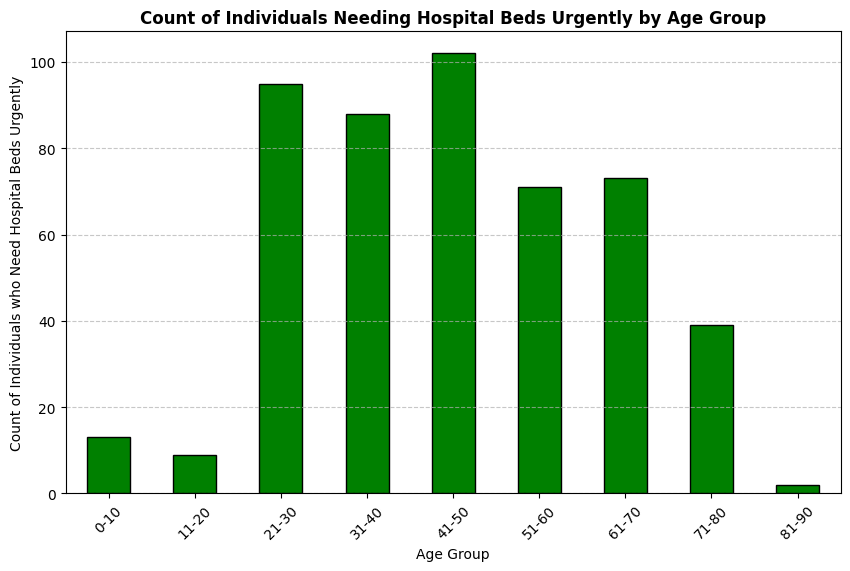

In [53]:
# Plot an appropriate graph to answer the following question
# Your code here
plt.figure(figsize=(10, 6))
urgency_counts.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Individuals who Need Hospital Beds Urgently', fontsize=10)
plt.title('Count of Individuals Needing Hospital Beds Urgently by Age Group', fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

### ⏸ Which age group has the most urgent need for a hospital bed?


#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [83]:
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'

In [54]:
# Drop rows where Urgency is equal to 0 (not urgent)
df_symptoms = df[df['Urgency'] !=0]
df_symptoms

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
6,38.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,31-40
7,45.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
10,42.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
12,65.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1,61-70
13,44.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,41-50
...,...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1,71-80
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,51-60
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,41-50
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,31-40


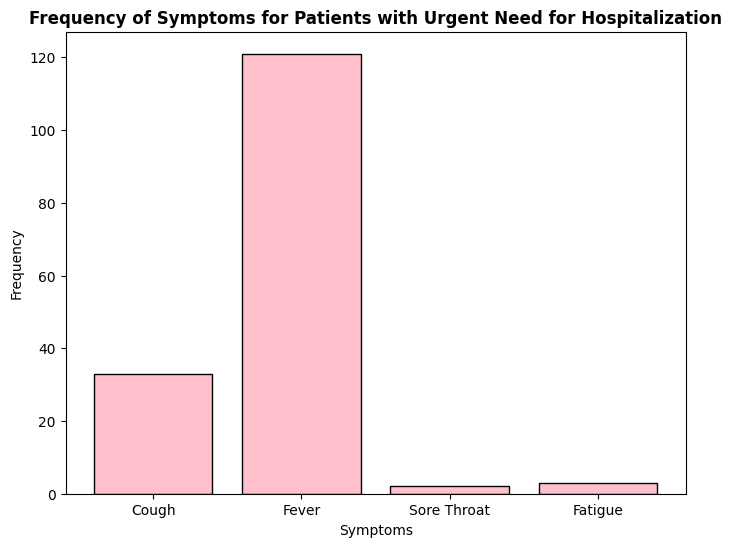

In [55]:
# Plot an appropriate graph to answer the following question    

# Your code here
urgent_patients = df_symptoms[df_symptoms['Urgency'] == 1]

frequency_cough = urgent_patients['cough'].sum()
frequency_fever = urgent_patients['fever'].sum()
frequency_sorethroat = urgent_patients['sore_throat'].sum()
frequency_fatigue = urgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

plt.figure(figsize=(8, 6))
plt.bar(symptoms, frequencies, color='pink', edgecolor='black')
plt.xlabel('Symptoms', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency of Symptoms for Patients with Urgent Need for Hospitalization', fontsize=12, weight='bold')

plt.show();

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [84]:
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'

In [56]:
# Dropping the rows where the patients are 'Urgent' in preparation for plotting
df_nonsymptoms = df[df['Urgency'] !=1]
df_nonsymptoms

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency,Age_Group
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,31-40
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,51-60
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,51-60
...,...,...,...,...,...,...,...,...,...,...
667,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
668,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,41-50
669,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21-30
670,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21-30


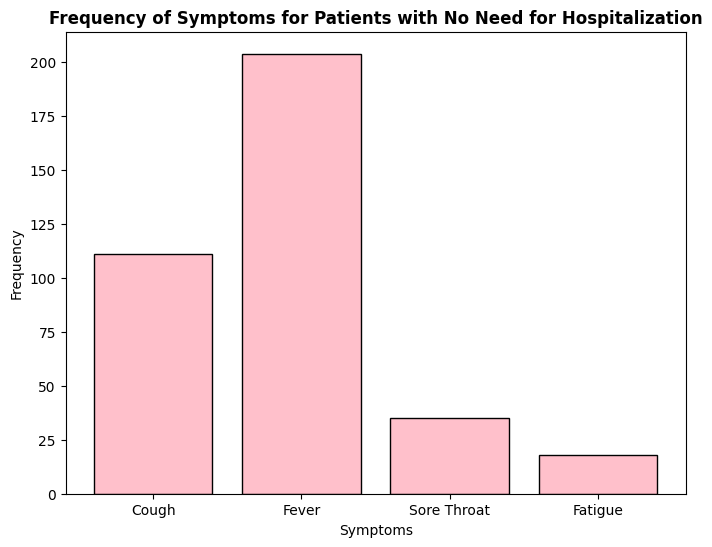

In [57]:
# Plot an appropriate graph to answer the following question    
# Your code here
nonurgent_patients = df_nonsymptoms[df_nonsymptoms['Urgency'] == 0]

frequency_cough = nonurgent_patients['cough'].sum()
frequency_fever = nonurgent_patients['fever'].sum()
frequency_sorethroat = nonurgent_patients['sore_throat'].sum()
frequency_fatigue = nonurgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

plt.figure(figsize=(8, 6))
plt.bar(symptoms, frequencies, color='pink', edgecolor='black')
plt.xlabel('Symptoms', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency of Symptoms for Patients with No Need for Hospitalization', fontsize=12, weight='bold')

plt.show();

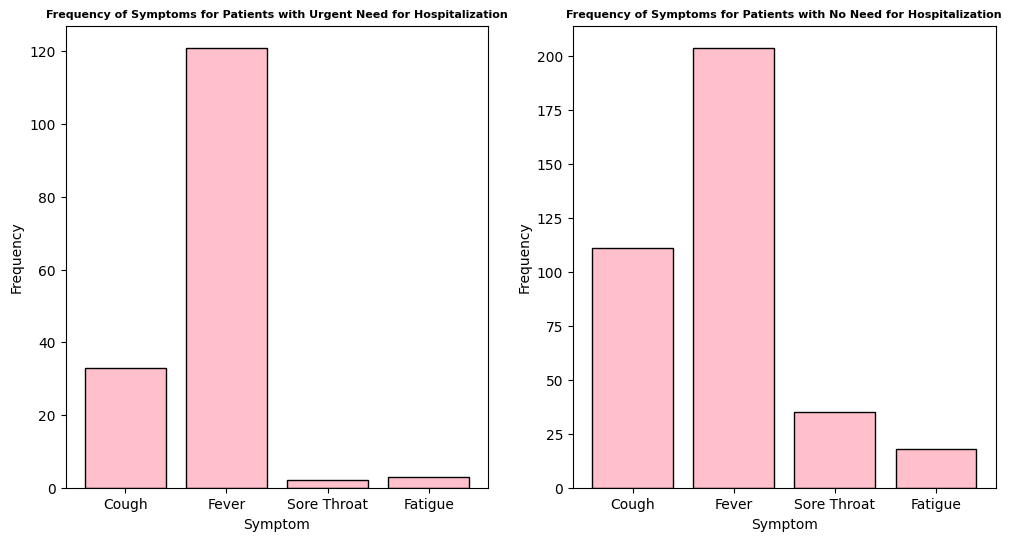

In [58]:
# Plotting two side-by-side bar charts showing the difference in the frequency of symptoms with urgent patients and non-urgent patients.
urgent_patients = df_symptoms[df_symptoms['Urgency'] == 1]

frequency_cough = urgent_patients['cough'].sum()
frequency_fever = urgent_patients['fever'].sum()
frequency_sorethroat = urgent_patients['sore_throat'].sum()
frequency_fatigue = urgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].bar(symptoms, frequencies, color='pink', edgecolor='black')
axs[0].set_title('Frequency of Symptoms for Patients with Urgent Need for Hospitalization', fontsize=8, weight='bold')
axs[0].set_xlabel('Symptom')
axs[0].set_ylabel('Frequency')

nonurgent_patients = df_nonsymptoms[df_nonsymptoms['Urgency'] == 0]

frequency_cough = nonurgent_patients['cough'].sum()
frequency_fever = nonurgent_patients['fever'].sum()
frequency_sorethroat = nonurgent_patients['sore_throat'].sum()
frequency_fatigue = nonurgent_patients['fatigue'].sum()

symptoms = ['Cough', 'Fever', 'Sore Throat', 'Fatigue']
frequencies = [frequency_cough, frequency_fever, frequency_sorethroat, frequency_fatigue]

axs[1].bar(symptoms, frequencies, color='pink', edgecolor='black')
axs[1].set_title('Frequency of Symptoms for Patients with No Need for Hospitalization', fontsize=8, weight='bold')
axs[1].set_xlabel('Symptom')
axs[1].set_ylabel('Frequency')
plt.show();

### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [85]:
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'

In [59]:
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split
print(df.isnull().sum())
# Your code here
df = df.dropna()
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

age            0
sex            0
cough          0
fever          0
chills         0
sore_throat    0
headache       0
fatigue        0
Urgency        0
Age_Group      0
dtype: int64


In [60]:
# Fixing the table to help it look better and readable by placing the two charts side by side for comparison. 
df['Urgency'] = df_imputed['Urgency']
df = df.drop(columns=['Age_Group'])
df

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
996,72.0,1.0,0.0,0.4,0.0,0.0,0.0,0.0,1
997,56.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
998,43.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
999,39.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [61]:
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split
print(df.isnull().sum())
# Your code here
df = df.dropna()
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

age            0
sex            0
cough          0
fever          0
chills         0
sore_throat    0
headache       0
fatigue        0
Urgency        0
dtype: int64


In [62]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv('covid_train.csv', index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv('covid_test.csv', index=False)


In [63]:
# Checking the validity of covid_train as a dataset
covid_train = pd.read_csv('covid_train.csv')
covid_train.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [64]:
# Checking the validity of covid test as a dataset
covid_test = pd.read_csv('covid_test.csv')
covid_test.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**II. Prediction Accuracy**

In [65]:
# Read the datafile "covid_train.csv"
df_train = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_train.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [66]:
# Read the datafile "covid_test.csv"
df_test = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_test.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [67]:
# Get the train predictors
df_train_predictors = ['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']
X_train = df_train[df_train_predictors]

# Get the train response variable
df_train_response = ['Urgency']
y_train = df_train[df_train_response]

In [68]:
# Get the test predictors
df_test_predictors = ['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']
X_test = df_test[df_test_predictors]

# Get the test response variable
df_test_response = ['Urgency']
y_test = df_test[df_test_response]

In [69]:
### edTest(test_model) ###

# Define your classification model
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the train data
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [70]:
### edTest(test_accuracy) ###

# Predict and compute the accuracy on the test data
y_pred = model.predict(X_test)

model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy is {model_accuracy}")


Model Accuracy is 0.6378737541528239


**III. Evaluating Predictions with Other Metrics**

In [71]:
# Read the datafile "covid_train.csv"
df_train = pd.read_csv('covid_train.csv')

# Take a quick look at the dataframe
df_train.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [72]:
# Read the datafile "covid_test.csv"
df_test = pd.read_csv('covid_test.csv')

# Take a quick look at the dataframe
df_test.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
# Get the train predictors
df_train_predictors = ['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']
X_train = df_train[df_train_predictors]

# Get the train response variable
df_train_response = ['Urgency']
y_train = df_train[df_train_response]

In [74]:
# Get the test predictors
df_test_predictors = ['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']
X_test = df_test[df_test_predictors]

# Get the test response variable
df_test_response = ['Urgency']
y_test = df_test[df_test_response]

In [75]:
# Define a kNN classification model with k = 7
knn_model = KNeighborsClassifier(n_neighbors=7)

# Fit the above model on the train data
knn_model.fit(X_train, y_train)

# Define a Logistic Regression model with max_iter as 10000 and C as 0.1 (leave all other parameters at default values)
log_model = LogisticRegression(max_iter=10000, C=0.1)

# Fit the Logistic Regression model on the train data
log_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

Now it is time to evaluate the models.

Create a dictionary called `metric_scores` which has keys `'Accuracy'`, `'Recall'`, `'Specificity'`, `'Precision'`, and `'F1-score'`. The value associated with each key should a list with a length 2, the first element being knn_model corresponding metric score and the second element being log_model corresponding metric score. All scores should be made on the **test** data.

Ex: metric_scores["F1-score"] = [knn_f1,log_f1]

In [76]:
# Predict both models on the test data 
y_pred_knn = knn_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Confusion matrix for both models
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
log_conf_matrix = confusion_matrix(y_test, y_pred_log)

# Function to compute specificity
def specificity(conf_matrix):
    true_negatives = conf_matrix[0, 0]
    false_positives = conf_matrix[0, 1]
    return true_negatives / (true_negatives + false_positives)

# Function to compute precision_score
def precision (conf_matrix): 
    true_positives = conf_matrix[1, 1]
    false_positives = conf_matrix[0, 1]
    return true_positives / (true_positives + false_positives) 

# Accuracy score for both models
knn_accuracy = accuracy_score(y_test, y_pred_knn)
log_accuracy = accuracy_score(y_test, y_pred_log)

# Recall score for both models
knn_recall = recall_score(y_test, y_pred_knn)
log_recall = recall_score(y_test, y_pred_log)

# F-1 score for both models
knn_f1 = f1_score(y_test, y_pred_knn)
log_f1 = f1_score(y_test, y_pred_log)

# Specificity for both models 
knn_specificity = specificity(knn_conf_matrix)
log_specificity = specificity(log_conf_matrix)

# Precision for both models
knn_precision = precision(knn_conf_matrix)
log_precision = precision(log_conf_matrix)

# For dictionary

metric_scores = {
    'Accuracy': [knn_accuracy, log_accuracy],
    'Recall': [knn_recall, log_recall],
    'Specificity': [knn_specificity, log_specificity],
    'Precision': [knn_precision, log_precision],
    'F1-score': [knn_f1, log_f1]
}

In [77]:
# Display your results
for metric, scores in metric_scores.items(): 
    print (f"{metric}: {scores}")

Accuracy: [0.6677740863787376, 0.6079734219269103]
Recall: [0.7163120567375887, 0.7163120567375887]
Specificity: [0.625, 0.5125]
Precision: [0.6273291925465838, 0.5642458100558659]
F1-score: [0.6688741721854304, 0.63125]


**IV. Plotting the ROC Curve**

In [78]:
# Read the datafile "covid_train.csv"
df_train = pd.read_csv('covid_train.csv')
# Take a quick look at the dataframe
df_train.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,37.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,35.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,39.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [79]:
# Read the datafile "covid_test.csv"
df_test = pd.read_csv('covid_test.csv')
# Take a quick look at the dataframe
df_test.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Separate the predictors from the response variables in both train and test sets.

In [81]:
# Get the train predictors
X_train = df_train[['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']]

# Get the train response variable
y_train = df_train['Urgency']

# Get the test predictors
X_test = df_test[['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']]

# Get the test response variable
y_test = df_test['Urgency']

We want to compare two different classifiers: kNN and logistic regression.

First, let's create a fit a kNN model and get's its predicted probabilities for the positive class on the test data.

**Hint:** Remember that the `predict_proba` method returns probabilities for all classes. We only want the probabilities for the positive class (i.e., $y = 1$). 

In [82]:
# Define a kNN classification model with k = 7
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the above model on the train data
y_train_1d = np.ravel(y_train)
knn.fit(X_train, y_train)

# Predict probabilities for the positive class on the test data using the kNN model
y_pred_knn = knn.predict_proba(X_test)[:, 1]

Now let's do the same for a logistic regression model.

In [87]:
# Define a Logistic Regression model with max_iter as 10000, C as 0.1, and a random_state of 42
logreg = LogisticRegression(max_iter=10000, C=0.1, random_state=42)

# Fit the Logistic Regression model on the train data
logreg.fit(X_train, y_train)

# Predict probabilities for the positive class on the test data using the logistic regression model
y_pred_logreg = logreg.predict_proba(X_test)[:, 1]

#### ROC Curve Review

The Bayes threshold of a binary classifier is the value for which all predicted probabilities greater than or equal to that value are labeled as the positive class. For example, a classifier with a Bayes threshold of 0.6 will classify all observations with a predicted probability, $p \geq 0.6$, as the positive class (1) and all observations with a predicted probability, $p < 0.6$, as the negative class (0).

The ROC curve shows us a model's false positive  and true positive rates across different settings of the Bayes Threshold. 

Recall that:
$$\text{False Positive Rate} = \frac{FP}{TN + FP}$$
$$\text{True Positive Rate} = \frac{TP}{TP + FN}$$

We will compute the false positve rate (FPR) and true positive rate (TPR) for a range of thresholds and use these values to plot ROC curves for both the kNN and the logistic regression models.

#### Thresholds

First, we need to generate a range of thresholds to use for turning our models' probability predictions into class labels. One naive approach might be to simply create a list of evenly spaced values between 0 and 1 and use these for both models. But this is not ideal. Consider the fact that some threshold changes will not actually affect the model's classification labels.

Example: if a model predicts probabilities `[0.54, 0.77, 0.79]` for 3 observations, all thresholds in the half-open interval (0.54, 0.77] will produce the exact same class labels: `[0, 1, 1]`

Another issue is that we may fail to see all changes in the class labels if our set of thresholds is not sufficiently granular. Consider the example of the 3 predicted probabilities above once more. If we use thresholds in steps of 0.05 (0, 0.05, 0.1, ..., 0.95, 1) we would only ever see class label predictions of [0, 1, 1] and [0, 0, 0]. We would miss an important threshold like 0.78 which would produce the class lables [0, 0, 1], potentially giving us a different TPR and FPR.

Our approach will be to evaluate just those thresholds that result in different class label predictions. And these precise thresholds will depend on our model.

Complete the `get_thresholds` function which takes a model's predicted probabilities on the test set and returns an array of thresholds to be considered.

In [88]:
def get_thresholds(y_pred_proba):
    # We only need to consider unique predicted probabilities
    unique_probas = np.unique(y_pred_proba)
    # Sort unique probabilities in descending order
    unique_probas_sorted = np.sort(unique_probas)[::-1]
   
    # We'll also add some additional thresholds to our set
    # This ensures our ROC curves reach the corners of the plot, (0,0) and (1,1)
    
    # Insert 1.1 at the beginning of the threshold array
    # 1.1 may seem like an odd threshold, but a value greater than 1
    # is required if we want the ROC curve to reach the lower left corner
    # (0 fpr, 0 tpr) considering one of our models produces probability predictions of 1
    thresholds = np.insert(unique_probas_sorted, 0, 1.1)
    # Append 0 to the end of the thresholds
    thresholds = np.append(thresholds, 0)
    return thresholds

In [89]:
knn_thresholds = get_thresholds(y_pred_knn)

logreg_thresholds = get_thresholds(y_pred_logreg)

#### FPR & TPR

Now we can use the true $y$ class label and the predicted probabilities to determine the the fpr and tpr on the test data for a specific threshold. Complete the `get_fpr` and `get_tpr` functions below.

In [92]:
def get_fpr(y_test, y_pred_proba, threshold):
    # your code here
    y_pred = (y_pred_proba >= threshold).astype(int)

    # True Positive (TP) and False Positive (FP)
    FP = np.sum((y_pred == 1) & (y_test == 0))
    TN = np.sum(y_test == 0) - FP

    # False Positive Rate (FPR)
    fpr = FP / (FP + TN)

    return fpr

In [93]:
def get_tpr(y_test, y_pred_proba, threshold):
    # your code here
    y_pred = (y_pred_proba >= threshold).astype(int)

    # True Positive (TP) and False Negative (FN)
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FN = np.sum(y_test == 1) - TP

    # True Positive Rate (TPR)
    tpr = TP / (TP + FN)

    return tpr

Use these functions to get the FPR and TPR for both models using each threshold for that model. These calculations can be done in a loop, but you should also try doing them with Python list comprehensions as well.

In [94]:
# Initialize empty list 
knn_fpr = []
knn_tpr = []
logreg_fpr = []
logreg_tpr = []

# Convert y_test to a one-dimensional array
y_test_array = y_test.values.ravel() if isinstance(y_test, pd.DataFrame) else y_test.ravel()

# For kNN Model 
for threshold in knn_thresholds:
    fpr = get_fpr(y_test_array, y_pred_knn, threshold)
    tpr = get_tpr(y_test_array, y_pred_knn, threshold)
    knn_fpr.append(fpr)
    knn_tpr.append(tpr)

# For Logistic Regression Model 
for threshold in logreg_thresholds:
    fpr = get_fpr(y_test_array, y_pred_logreg, threshold)
    tpr = get_tpr(y_test_array, y_pred_logreg, threshold)
    logreg_fpr.append(fpr)
    logreg_tpr.append(tpr)

#### Area Under the Curve

The AUC gives us an idea as to how well our model does across *all* thresholds.

For our final calculations, use each model's predicted probabilities to compute its test AUC with the help of SKLearn's `roc_auc_score` function.

In [95]:
# Compute the ROC AUC score of the Logistic model
knn_auc = roc_auc_score(y_test, y_pred_knn)

# Compute the ROC AUC score of the kNN model
logreg_auc = roc_auc_score(y_test, y_pred_logreg)

You're ready to visualize your results!

Most of the code is provided. You just need to fill in the values to be plotted for the two models' ROC curves.

Remember that the convention is that false positive rate is on the $x$-axis and true positive rate is on the $y$-axis.

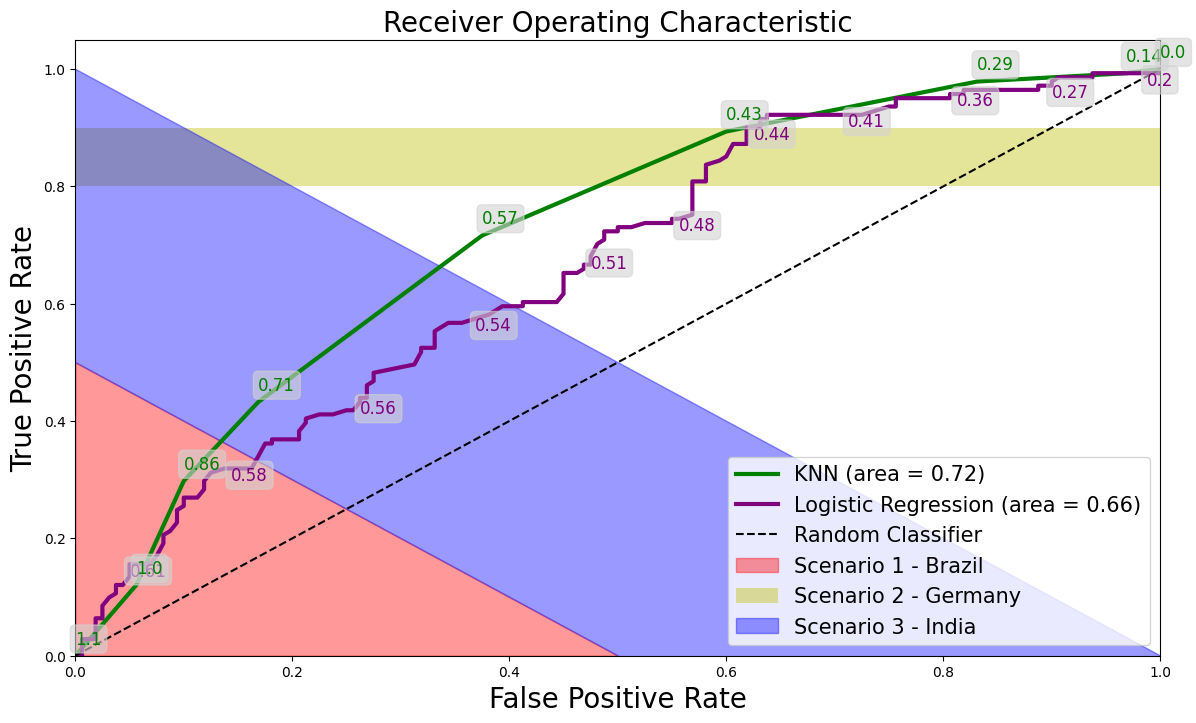

In [96]:
# Area under curve - Logistic Regression & kNN
fig, ax = plt.subplots(figsize = (14,8))

# Plot KNN Regression ROC Curve
ax.plot(knn_fpr,
        knn_tpr,
        label=f'KNN (area = {knn_auc:.2f})',
        color='g',
        lw=3)

# Plot Logistic Regression ROC Curve
ax.plot(logreg_fpr,
        logreg_tpr,
        label=f'Logistic Regression (area = {logreg_auc:.2f})',
        color = 'purple',
        lw=3)

# Threshold annotations
label_kwargs = {}
label_kwargs['bbox'] = dict(
    boxstyle='round, pad=0.3', color='lightgray', alpha=0.6
)
eps = 0.02 # offset
for i in range(0, len(logreg_fpr),15):
    threshold = str(np.round(logreg_thresholds[i], 2))
    ax.annotate(threshold, (logreg_fpr[i], logreg_tpr[i]-eps), fontsize=12, color='purple', **label_kwargs)

for i in range(0, len(knn_fpr)-1):
    threshold = str(np.round(knn_thresholds[i], 2))
    ax.annotate(threshold, (knn_fpr[i], knn_tpr[i]+eps), fontsize=12, color='green', **label_kwargs)

# Plot diagonal line representing a random classifier
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Scenario 1 - Brazil
ax.fill_between([0,0.5],[0.5,0], color = 'red', alpha = 0.4, label='Scenario 1 - Brazil');

# Scenario 2 - Germany
ax.axhspan(0.8, 0.9, facecolor='y', alpha=0.4, label = 'Scenario 2 - Germany');

# Scenario 3 - India
ax.fill_between([0,1],[1,0],[0.5,-0.5], alpha = 0.4, color = 'blue', label = 'Scenario 3 - India');

ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.set_xlabel('False Positive Rate', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=20)
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.legend(loc="lower right", fontsize=15)
plt.show()